In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
calendar=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\PP\HeroVIRED Capstone\calendar.csv")

In [3]:
calendar

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125
...,...,...,...,...,...,...,...,...
319187,319188,52729945,2022-07-06 00:00:00.000000,1,64.0,64.0,1,10
319188,319189,36953202,2022-07-08 00:00:00.000000,0,140.0,140.0,3,1125
319189,319190,39580214,2022-06-13 00:00:00.000000,1,49.0,49.0,1,13
319190,319191,49016014,2022-10-26 00:00:00.000000,0,60.0,60.0,2,30


In [4]:
calendar['Booking_date']=calendar['date']
calendar

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Booking_date
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5,2022-08-03 00:00:00.000000
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99,2022-11-13 00:00:00.000000
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125,2022-04-17 00:00:00.000000
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000,2022-01-31 00:00:00.000000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125,2022-05-21 00:00:00.000000
...,...,...,...,...,...,...,...,...,...
319187,319188,52729945,2022-07-06 00:00:00.000000,1,64.0,64.0,1,10,2022-07-06 00:00:00.000000
319188,319189,36953202,2022-07-08 00:00:00.000000,0,140.0,140.0,3,1125,2022-07-08 00:00:00.000000
319189,319190,39580214,2022-06-13 00:00:00.000000,1,49.0,49.0,1,13,2022-06-13 00:00:00.000000
319190,319191,49016014,2022-10-26 00:00:00.000000,0,60.0,60.0,2,30,2022-10-26 00:00:00.000000


In [5]:
calendar=calendar.drop(calendar[['date']],axis=1)
calendar

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,Booking_date
0,1,40334325,0,56.0,56.0,3,5,2022-08-03 00:00:00.000000
1,2,22742449,1,95.0,95.0,2,99,2022-11-13 00:00:00.000000
2,3,34621717,0,75.0,75.0,2,1125,2022-04-17 00:00:00.000000
3,4,38281744,1,150.0,150.0,1,1000,2022-01-31 00:00:00.000000
4,5,18835003,0,100.0,100.0,2,1125,2022-05-21 00:00:00.000000
...,...,...,...,...,...,...,...,...
319187,319188,52729945,1,64.0,64.0,1,10,2022-07-06 00:00:00.000000
319188,319189,36953202,0,140.0,140.0,3,1125,2022-07-08 00:00:00.000000
319189,319190,39580214,1,49.0,49.0,1,13,2022-06-13 00:00:00.000000
319190,319191,49016014,0,60.0,60.0,2,30,2022-10-26 00:00:00.000000


In [6]:
calendar[['Booking date', 'Time_stamp']] = calendar['Booking_date'].str.split(' ', expand=True)
calendar[['Booking date', 'Time_stamp']]

,Booking date,Time_stamp
0,2022-08-03,00:00:00.000000
1,2022-11-13,00:00:00.000000
2,2022-04-17,00:00:00.000000
3,2022-01-31,00:00:00.000000
4,2022-05-21,00:00:00.000000
...,...,...
319187,2022-07-06,00:00:00.000000
319188,2022-07-08,00:00:00.000000
319189,2022-06-13,00:00:00.000000
319190,2022-10-26,00:00:00.000000


In [7]:
calendar

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,Booking_date,Booking date,Time_stamp
0,1,40334325,0,56.0,56.0,3,5,2022-08-03 00:00:00.000000,2022-08-03,00:00:00.000000
1,2,22742449,1,95.0,95.0,2,99,2022-11-13 00:00:00.000000,2022-11-13,00:00:00.000000
2,3,34621717,0,75.0,75.0,2,1125,2022-04-17 00:00:00.000000,2022-04-17,00:00:00.000000
3,4,38281744,1,150.0,150.0,1,1000,2022-01-31 00:00:00.000000,2022-01-31,00:00:00.000000
4,5,18835003,0,100.0,100.0,2,1125,2022-05-21 00:00:00.000000,2022-05-21,00:00:00.000000
...,...,...,...,...,...,...,...,...,...,...
319187,319188,52729945,1,64.0,64.0,1,10,2022-07-06 00:00:00.000000,2022-07-06,00:00:00.000000
319188,319189,36953202,0,140.0,140.0,3,1125,2022-07-08 00:00:00.000000,2022-07-08,00:00:00.000000
319189,319190,39580214,1,49.0,49.0,1,13,2022-06-13 00:00:00.000000,2022-06-13,00:00:00.000000
319190,319191,49016014,0,60.0,60.0,2,30,2022-10-26 00:00:00.000000,2022-10-26,00:00:00.000000


In [8]:
calendar['Time_stamp'].unique()

array(['00:00:00.000000'], dtype=object)

As there are no important data in Timestamp, dropping Time_stamp and booking_date column

In [9]:
calendar=calendar.drop(calendar[["Time_stamp","Booking_date"]],axis=1)
calendar

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,Booking date
0,1,40334325,0,56.0,56.0,3,5,2022-08-03
1,2,22742449,1,95.0,95.0,2,99,2022-11-13
2,3,34621717,0,75.0,75.0,2,1125,2022-04-17
3,4,38281744,1,150.0,150.0,1,1000,2022-01-31
4,5,18835003,0,100.0,100.0,2,1125,2022-05-21
...,...,...,...,...,...,...,...,...
319187,319188,52729945,1,64.0,64.0,1,10,2022-07-06
319188,319189,36953202,0,140.0,140.0,3,1125,2022-07-08
319189,319190,39580214,1,49.0,49.0,1,13,2022-06-13
319190,319191,49016014,0,60.0,60.0,2,30,2022-10-26


#### Now checking the calendar data and finding anomalies in it.

##### 1. Checking for the null Values.

In [10]:
calendar.isna().sum()

calender_id        0
listing_id         0
available          0
price             75
adjusted_price    75
minimum_nights     0
maximum_nights     0
Booking date       0
dtype: int64

##### As there are 75 data points are empty we need to to impute the data, will use .describe() functions for the two columns and we will check for outliers using box plot

In [11]:
calendar[["price","adjusted_price"]].describe()

,price,adjusted_price
count,319117.000000,319117.000000
mean,109.917779,109.712131
std,185.791168,185.551851
min,13.000000,13.000000
25%,59.000000,58.000000
50%,79.000000,79.000000
75%,115.000000,115.000000
max,5800.000000,5800.000000


AS the standard deviation is more than the mean this indicates high variation between values, and abnormal distribution for data.

###### Checking with boxplot and imputing data 

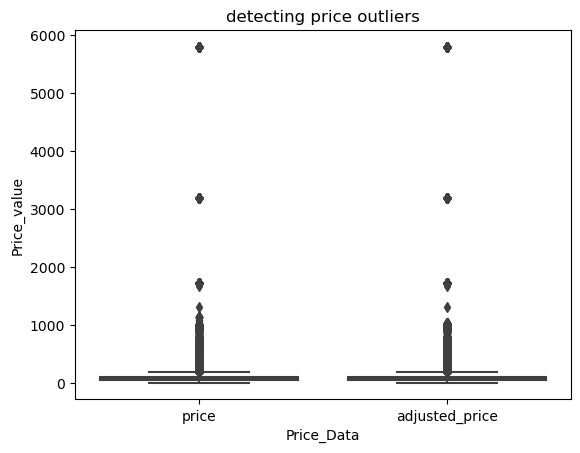

In [12]:
sns.boxplot(data=calendar[['price',"adjusted_price"]])
plt.ylabel('Price_value')
plt.xlabel('Price_Data')
plt.title('detecting price outliers')
plt.show()

As the data have many outliers we need to impute the data using median of the data in price and adjusted price columns

In [13]:
calendar[['price',"adjusted_price"]].median()

price             79.0
adjusted_price    79.0
dtype: float64

In [14]:
calendar['price'].fillna(calendar['price'].median(),inplace=True)

In [15]:
calendar['adjusted_price'].fillna(calendar['adjusted_price'].median(),inplace=True)

In [16]:
calendar.isna().sum()

calender_id       0
listing_id        0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
Booking date      0
dtype: int64

Now checking for duplicates in the data

In [17]:
duplicate_values=calendar[calendar.duplicated()]
duplicate_values

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,Booking date


As we can see there are no duplicates, can proceed further to another dataset

In [18]:
Hosts=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\PP\HeroVIRED Capstone\hosts.csv")
Hosts

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...
...,...,...,...,...,...
1106,434049804,Mathias,2021-11-30 00:00:00.000000,BE,NaN
1107,435722877,Tatjana,2021-12-12 00:00:00.000000,BE,NaN
1108,435999398,Flor,2021-12-14 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
1109,436739371,Naser,2021-12-20 00:00:00.000000,BE,NaN


Now seperating the date from host_since columns

In [19]:
Hosts['host_since']

0       2010-09-14 00:00:00.000000
1       2011-01-04 00:00:00.000000
2       2011-02-27 00:00:00.000000
3       2011-03-20 00:00:00.000000
4       2011-03-25 00:00:00.000000
                   ...            
1106    2021-11-30 00:00:00.000000
1107    2021-12-12 00:00:00.000000
1108    2021-12-14 00:00:00.000000
1109    2021-12-20 00:00:00.000000
1110    2021-12-24 00:00:00.000000
Name: host_since, Length: 1111, dtype: object

In [20]:
Hosts[['host_since_date', 'host_since_Time_stamp']] = Hosts['host_since'].str.split(' ', expand=True)
Hosts[['host_since_date', 'host_since_Time_stamp']]

,host_since_date,host_since_Time_stamp
0,2010-09-14,00:00:00.000000
1,2011-01-04,00:00:00.000000
2,2011-02-27,00:00:00.000000
3,2011-03-20,00:00:00.000000
4,2011-03-25,00:00:00.000000
...,...,...
1106,2021-11-30,00:00:00.000000
1107,2021-12-12,00:00:00.000000
1108,2021-12-14,00:00:00.000000
1109,2021-12-20,00:00:00.000000


Now removing the host_since and host_since_Time_stamp columns afrer checking unique values in timestamp

In [21]:
Hosts['host_since_Time_stamp'].unique()

array(['00:00:00.000000'], dtype=object)

###### No unique values in time_stamp

In [22]:
Hosts=Hosts.drop(["host_since_Time_stamp","host_since"],axis=1)
Hosts

,host_id,host_name,host_location,host_about,host_since_date
0,234077,Karin,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2010-09-14
1,334804,Ann,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo...",2011-01-04
2,413052,Valérie,"Antwerp, Flanders, Belgium",NaN,2011-02-27
3,452791,Tatiana,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...,2011-03-20
4,462975,Els,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...,2011-03-25
...,...,...,...,...,...
1106,434049804,Mathias,BE,NaN,2021-11-30
1107,435722877,Tatjana,BE,NaN,2021-12-12
1108,435999398,Flor,"Antwerp, Flanders, Belgium",NaN,2021-12-14
1109,436739371,Naser,BE,NaN,2021-12-20


checking for null and duplicate values in the dataset

In [23]:
Hosts.isna().sum()

host_id              0
host_name            0
host_location        3
host_about         621
host_since_date      0
dtype: int64

As host_about is not necsary for analysis, dropping the same column

In [24]:
Hosts=Hosts.drop(['host_about'],axis=1)

In [25]:
Hosts['host_location'].mode()

0    Antwerp, Flanders, Belgium
Name: host_location, dtype: object

Imputing the null values with mode

In [26]:
Hosts['host_location'].fillna(Hosts['host_location'].mode()[0],inplace=True)

In [27]:
Hosts.isna().sum()

host_id            0
host_name          0
host_location      0
host_since_date    0
dtype: int64

Checking for Duplicate Values

In [28]:
Hosts[Hosts.duplicated()]

,host_id,host_name,host_location,host_since_date


As there are no duplicate values we cam move to another dataset

In [29]:
listings=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\PP\HeroVIRED Capstone\listings.csv")
listings.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


In [30]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="AirBNB_DATA")


address = geolocator.reverse('51.217220,4.397900')
reverse_address=str(address.address)
address1=list(reverse_address.split(','))
address1

['19',
 ' Korte Riddersstraat',
 ' Sint-Andries',
 ' Sint-Anna',
 ' Antwerpen',
 ' Vlaanderen',
 ' 2000',
 ' België / Belgique / Belgien']

In [31]:
listings

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,53916524,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,Industrial loft (110m²) with a relaxing urban ...,51.231330,4.403520,Entire loft,Entire home/apt,2,1.5 baths,1.0,1.0,"[""Refrigerator"", ""Elevator"", ""Yamaha RX-A550 s...",46300712
1745,53928545,https://www.airbnb.com/rooms/53928545,Studio in het midden van Antwerpen,Recent gerenoveerde rustige studio van circa 2...,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Hot water"", ""Long term stays allowed"", ""Kitc...",74268936
1746,53929354,https://www.airbnb.com/rooms/53929354,Mooi appartement met open haard,Vanuit deze ideaal gelegen accommodatie kun je...,51.200340,4.421060,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Kitchen"", ""Smoke alarm"", ""Outdoor furniture""...",334036639
1747,53949105,https://www.airbnb.com/rooms/53949105,Kasteel Boterlaerhof vlakbij Antwerpen,"Kasteel Boterlaerhof ligt ideaal gelegen, op 1...",51.212320,4.482230,Castle,Entire home/apt,16,7.5 baths,7.0,33.0,"[""Refrigerator"", ""Private garden or backyard"",...",377595714


###### Checking for null values and dropping unnecessary columns in the dataset

In [32]:
listings.isna().sum()

listing_id          0
listing_url         0
name                0
description        70
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms          128
beds               41
amenities           0
host_id             0
dtype: int64

In [33]:
listings[["description","name","listing_url"]]

,description,name,listing_url
0,Decorated in a vintage style combined with a f...,aplace/antwerp: cosy suite - fashion district,https://www.airbnb.com/rooms/50904
1,Enjoy your stay at our 4 person apartment in t...,Spacious apartment nearby Mas,https://www.airbnb.com/rooms/116134
2,Do you enjoy authentic places with a lot of ch...,Apartment with terrace in trendy Zurenborg,https://www.airbnb.com/rooms/218916
3,"Large bedroom in classic 1930s house. Kitchen,...",Large stylish room in 1930s house + garden,https://www.airbnb.com/rooms/224333
4,"<b>The space</b><br />Apartment ""Roscam"" is a ...",APARTMENT ROSCAM - OLD CENTRE ANTWERP,https://www.airbnb.com/rooms/224682
...,...,...,...
1744,Industrial loft (110m²) with a relaxing urban ...,Industrial spacious loft in Antwerp!,https://www.airbnb.com/rooms/53916524
1745,Recent gerenoveerde rustige studio van circa 2...,Studio in het midden van Antwerpen,https://www.airbnb.com/rooms/53928545
1746,Vanuit deze ideaal gelegen accommodatie kun je...,Mooi appartement met open haard,https://www.airbnb.com/rooms/53929354
1747,"Kasteel Boterlaerhof ligt ideaal gelegen, op 1...",Kasteel Boterlaerhof vlakbij Antwerpen,https://www.airbnb.com/rooms/53949105


Dropping the above columns as they are not necessary for data analysis

In [34]:
listings=listings.drop(listings[["description","name","listing_url"]],axis=1)
listings

,listing_id,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933
...,...,...,...,...,...,...,...,...,...,...,...
1744,53916524,51.231330,4.403520,Entire loft,Entire home/apt,2,1.5 baths,1.0,1.0,"[""Refrigerator"", ""Elevator"", ""Yamaha RX-A550 s...",46300712
1745,53928545,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Hot water"", ""Long term stays allowed"", ""Kitc...",74268936
1746,53929354,51.200340,4.421060,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Kitchen"", ""Smoke alarm"", ""Outdoor furniture""...",334036639
1747,53949105,51.212320,4.482230,Castle,Entire home/apt,16,7.5 baths,7.0,33.0,"[""Refrigerator"", ""Private garden or backyard"",...",377595714


In [35]:
listings.isna().sum()

listing_id          0
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms          128
beds               41
amenities           0
host_id             0
dtype: int64

In [36]:
listings[["bedrooms","beds"]].describe()

,bedrooms,beds
count,1621.000000,1708.000000
mean,1.529303,2.220726
std,1.091453,2.227509
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,3.000000
max,20.000000,44.000000


<Axes: >

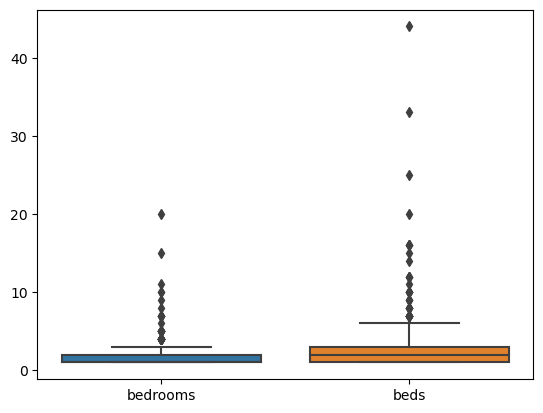

In [37]:
sns.boxplot(data=listings[["bedrooms","beds"]])

In [38]:
listings[["bedrooms","beds"]].median()

bedrooms    1.0
beds        2.0
dtype: float64

As there are many outliers, imputing the null values in data with median. 

In [39]:
listings['bedrooms'].fillna(listings['bedrooms'].median(),inplace=True)
listings['beds'].fillna(listings['beds'].median(),inplace=True)

In [40]:
listings.isna().sum()

listing_id        0
latitude          0
longitude         0
property_type     0
room_type         0
accomodates       0
bathrooms_text    0
bedrooms          0
beds              0
amenities         0
host_id           0
dtype: int64

In [41]:
listings.dtypes

listing_id          int64
latitude          float64
longitude         float64
property_type      object
room_type          object
accomodates         int64
bathrooms_text     object
bedrooms          float64
beds              float64
amenities          object
host_id             int64
dtype: object

Now handling the bathroom_text column

In [42]:
listings['bathrooms_text']

0       1 private bath
1            2.5 baths
2               1 bath
3       2 shared baths
4               1 bath
             ...      
1744         1.5 baths
1745            1 bath
1746            1 bath
1747         7.5 baths
1748         1.5 baths
Name: bathrooms_text, Length: 1749, dtype: object

In [43]:
listings[['Number_of_bathrooms',"Type_of_Bathrooms","Bath"]]= listings['bathrooms_text'].str.split(' ', expand=True)
listings[['Number_of_bathrooms',"Type_of_Bathrooms","Bath"]]

,Number_of_bathrooms,Type_of_Bathrooms,Bath
0,1,private,bath
1,2.5,baths,None
2,1,bath,None
3,2,shared,baths
4,1,bath,None
...,...,...,...
1744,1.5,baths,None
1745,1,bath,None
1746,1,bath,None
1747,7.5,baths,None


Dropping the type of bathroom and bath columns

In [44]:
listings=listings.drop(listings[["Type_of_Bathrooms","Bath",'bathrooms_text']],axis=1)
listings

,listing_id,latitude,longitude,property_type,room_type,accomodates,bedrooms,beds,amenities,host_id,Number_of_bathrooms
0,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,1
1,116134,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,2.5
2,218916,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664,1
3,224333,51.197720,4.458530,Private room in residential home,Private room,2,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377,2
4,224682,51.217220,4.397900,Entire rental unit,Entire home/apt,3,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933,1
...,...,...,...,...,...,...,...,...,...,...,...
1744,53916524,51.231330,4.403520,Entire loft,Entire home/apt,2,1.0,1.0,"[""Refrigerator"", ""Elevator"", ""Yamaha RX-A550 s...",46300712,1.5
1745,53928545,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Hot water"", ""Long term stays allowed"", ""Kitc...",74268936,1
1746,53929354,51.200340,4.421060,Entire rental unit,Entire home/apt,4,1.0,2.0,"[""Kitchen"", ""Smoke alarm"", ""Outdoor furniture""...",334036639,1
1747,53949105,51.212320,4.482230,Castle,Entire home/apt,16,7.0,33.0,"[""Refrigerator"", ""Private garden or backyard"",...",377595714,7.5


In the number of bathroom secimal values are present, changing it to whole number by using floor function

In [45]:
listings['Number_of_bathrooms'].unique()

array(['1', '2.5', '2', '1.5', 'Shared', '3', '3.5', '8.5', '0',
       'Half-bath', 'Private', '5', '4', '6.5', '15.5', '8', '6', '7.5'],
      dtype=object)

As observed from the data set there are string values present so replacing half-bath,shared-bath and private bath with values after checking the outliers of data

<Axes: >

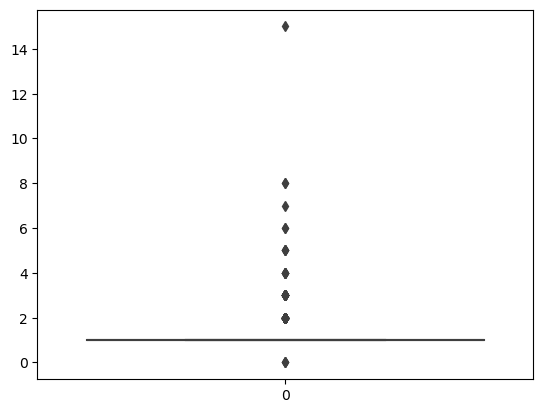

In [76]:
sns.boxplot(data=listings['Number_of_bathrooms'])

Now checking the skewness of the data

<Axes: xlabel='Number_of_bathrooms', ylabel='Count'>

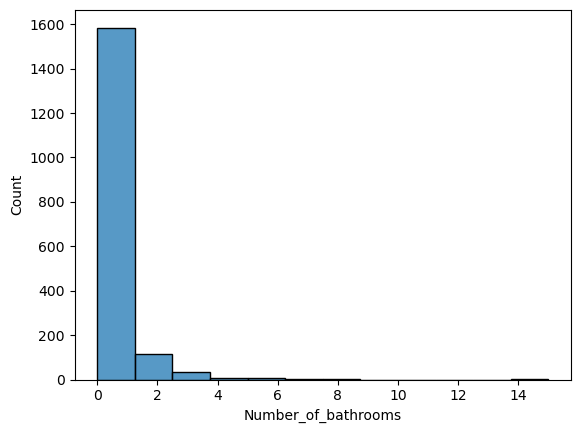

In [78]:
sns.histplot(data=listings['Number_of_bathrooms'])

As there are many outliers and highly skewed, so replacing values with median

In [77]:
listings['Number_of_bathrooms'].median()

1.0

In [46]:
listings['Number_of_bathrooms'].replace(['Half-bath', 'Private','Shared'], 1, inplace=True)

In [47]:
listings['Number_of_bathrooms'].unique()

array(['1', '2.5', '2', '1.5', 1, '3', '3.5', '8.5', '0', '5', '4', '6.5',
       '15.5', '8', '6', '7.5'], dtype=object)

now changing the data type to float for further processing

In [48]:
listings['Number_of_bathrooms']=listings['Number_of_bathrooms'].astype(float)

In [49]:
listings['Number_of_bathrooms']=listings['Number_of_bathrooms'].apply(np.floor)
listings['Number_of_bathrooms']

0       1.0
1       2.0
2       1.0
3       2.0
4       1.0
       ... 
1744    1.0
1745    1.0
1746    1.0
1747    7.0
1748    1.0
Name: Number_of_bathrooms, Length: 1749, dtype: float64

In [50]:
listings['Number_of_bathrooms'].unique()

array([ 1.,  2.,  3.,  8.,  0.,  5.,  4.,  6., 15.,  7.])

In [51]:
listings.dtypes

listing_id               int64
latitude               float64
longitude              float64
property_type           object
room_type               object
accomodates              int64
bedrooms               float64
beds                   float64
amenities               object
host_id                  int64
Number_of_bathrooms    float64
dtype: object

In [52]:
listings.isna().sum()

listing_id             0
latitude               0
longitude              0
property_type          0
room_type              0
accomodates            0
bedrooms               0
beds                   0
amenities              0
host_id                0
Number_of_bathrooms    0
dtype: int64

AS There are no null values, moving towards next data

In [53]:
reviews=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\PP\HeroVIRED Capstone\reviews.csv")
reviews

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...
...,...,...,...,...,...,...
62982,62983,53538847,2021-12-05 00:00:00.000000,48076753,Serge,The place as it's shown in the photos. Great l...
62983,62984,53600839,2021-12-12 00:00:00.000000,6635741,Dániel,The spacious apartment is idyllically located ...
62984,62985,53819793,2021-12-21 00:00:00.000000,247934155,Gijs,It was great
62985,62986,53825194,2021-12-19 00:00:00.000000,361042882,Siarhei,Flor es muy atenta y me ayudo mucho entrando a...


In [54]:
reviews["review_date"]=reviews["date"]
reviews

,review_id,listing_id,date,reviewer_id,reviewer_name,comments,review_date
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...,2015-05-06 00:00:00.000000
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help...",2021-10-10 00:00:00.000000
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,...",2012-03-05 00:00:00.000000
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar...",2012-05-25 00:00:00.000000
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...,2013-09-03 00:00:00.000000
...,...,...,...,...,...,...,...
62982,62983,53538847,2021-12-05 00:00:00.000000,48076753,Serge,The place as it's shown in the photos. Great l...,2021-12-05 00:00:00.000000
62983,62984,53600839,2021-12-12 00:00:00.000000,6635741,Dániel,The spacious apartment is idyllically located ...,2021-12-12 00:00:00.000000
62984,62985,53819793,2021-12-21 00:00:00.000000,247934155,Gijs,It was great,2021-12-21 00:00:00.000000
62985,62986,53825194,2021-12-19 00:00:00.000000,361042882,Siarhei,Flor es muy atenta y me ayudo mucho entrando a...,2021-12-19 00:00:00.000000


In [55]:
reviews=reviews.drop(["date"],axis=1)
reviews

,review_id,listing_id,reviewer_id,reviewer_name,comments,review_date
0,1,50904,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...,2015-05-06 00:00:00.000000
1,2,50904,333559,Emilie,"Karin is a wonderful host, she was really help...",2021-10-10 00:00:00.000000
2,3,116134,928644,Aurélien,"Amazing flat, really close from the MAS Musem,...",2012-03-05 00:00:00.000000
3,4,116134,231288,Gail,"This is a well equipped, very comfortable apar...",2012-05-25 00:00:00.000000
4,5,116134,7984251,Marcel,This is a very nice appartement. We really lik...,2013-09-03 00:00:00.000000
...,...,...,...,...,...,...
62982,62983,53538847,48076753,Serge,The place as it's shown in the photos. Great l...,2021-12-05 00:00:00.000000
62983,62984,53600839,6635741,Dániel,The spacious apartment is idyllically located ...,2021-12-12 00:00:00.000000
62984,62985,53819793,247934155,Gijs,It was great,2021-12-21 00:00:00.000000
62985,62986,53825194,361042882,Siarhei,Flor es muy atenta y me ayudo mucho entrando a...,2021-12-19 00:00:00.000000


Now checking for null values, duplicates and removing unecessary cloumns

In [56]:
reviews=reviews.drop(["comments"],axis=1)
reviews

,review_id,listing_id,reviewer_id,reviewer_name,review_date
0,1,50904,19482395,Jihae,2015-05-06 00:00:00.000000
1,2,50904,333559,Emilie,2021-10-10 00:00:00.000000
2,3,116134,928644,Aurélien,2012-03-05 00:00:00.000000
3,4,116134,231288,Gail,2012-05-25 00:00:00.000000
4,5,116134,7984251,Marcel,2013-09-03 00:00:00.000000
...,...,...,...,...,...
62982,62983,53538847,48076753,Serge,2021-12-05 00:00:00.000000
62983,62984,53600839,6635741,Dániel,2021-12-12 00:00:00.000000
62984,62985,53819793,247934155,Gijs,2021-12-21 00:00:00.000000
62985,62986,53825194,361042882,Siarhei,2021-12-19 00:00:00.000000


In [57]:
reviews[['Review_date','Time_stamp']]=reviews['review_date'].str.split(' ', expand=True)
reviews

,review_id,listing_id,reviewer_id,reviewer_name,review_date,Review_date,Time_stamp
0,1,50904,19482395,Jihae,2015-05-06 00:00:00.000000,2015-05-06,00:00:00.000000
1,2,50904,333559,Emilie,2021-10-10 00:00:00.000000,2021-10-10,00:00:00.000000
2,3,116134,928644,Aurélien,2012-03-05 00:00:00.000000,2012-03-05,00:00:00.000000
3,4,116134,231288,Gail,2012-05-25 00:00:00.000000,2012-05-25,00:00:00.000000
4,5,116134,7984251,Marcel,2013-09-03 00:00:00.000000,2013-09-03,00:00:00.000000
...,...,...,...,...,...,...,...
62982,62983,53538847,48076753,Serge,2021-12-05 00:00:00.000000,2021-12-05,00:00:00.000000
62983,62984,53600839,6635741,Dániel,2021-12-12 00:00:00.000000,2021-12-12,00:00:00.000000
62984,62985,53819793,247934155,Gijs,2021-12-21 00:00:00.000000,2021-12-21,00:00:00.000000
62985,62986,53825194,361042882,Siarhei,2021-12-19 00:00:00.000000,2021-12-19,00:00:00.000000


In [58]:
reviews['Time_stamp'].unique()

array(['00:00:00.000000'], dtype=object)

In [59]:
reviews=reviews.drop(reviews[['Time_stamp','review_date']],axis=1)
reviews

,review_id,listing_id,reviewer_id,reviewer_name,Review_date
0,1,50904,19482395,Jihae,2015-05-06
1,2,50904,333559,Emilie,2021-10-10
2,3,116134,928644,Aurélien,2012-03-05
3,4,116134,231288,Gail,2012-05-25
4,5,116134,7984251,Marcel,2013-09-03
...,...,...,...,...,...
62982,62983,53538847,48076753,Serge,2021-12-05
62983,62984,53600839,6635741,Dániel,2021-12-12
62984,62985,53819793,247934155,Gijs,2021-12-21
62985,62986,53825194,361042882,Siarhei,2021-12-19


Checking for null Values

In [60]:
reviews.isna().sum()

review_id        0
listing_id       0
reviewer_id      0
reviewer_name    0
Review_date      0
dtype: int64

In [61]:
reviews[reviews.duplicated()]

,review_id,listing_id,reviewer_id,reviewer_name,Review_date


as there are no duplicate values,now joining the datasets based on common columns

In [62]:
print(calendar.columns)
print()
print(Hosts.columns)
print()
print(listings.columns)
print()
print(reviews.columns)

Index(['calender_id', 'listing_id', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights', 'Booking date'],
      dtype='object')

Index(['host_id', 'host_name', 'host_location', 'host_since_date'], dtype='object')

Index(['listing_id', 'latitude', 'longitude', 'property_type', 'room_type',
       'accomodates', 'bedrooms', 'beds', 'amenities', 'host_id',
       'Number_of_bathrooms'],
      dtype='object')

Index(['review_id', 'listing_id', 'reviewer_id', 'reviewer_name',
       'Review_date'],
      dtype='object')


In [63]:
merge1=pd.merge(calendar, listings, on='listing_id', how='inner')
merge1

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,Booking date,latitude,longitude,property_type,room_type,accomodates,bedrooms,beds,amenities,host_id,Number_of_bathrooms
0,1,40334325,0,56.0,56.0,3,5,2022-08-03,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0
1,2109,40334325,1,56.0,56.0,3,5,2022-02-14,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0
2,3617,40334325,0,56.0,56.0,3,5,2022-04-26,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0
3,5560,40334325,0,56.0,56.0,3,5,2022-04-08,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0
4,8188,40334325,0,56.0,56.0,3,5,2022-04-11,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319187,303596,52592822,0,30.0,30.0,28,365,2022-04-10,51.17848,4.42773,Entire condominium (condo),Entire home/apt,4,2.0,1.0,"[""Long term stays allowed"", ""Kitchen"", ""Smoke ...",132555399,1.0
319188,304185,52592822,1,30.0,30.0,28,365,2022-08-01,51.17848,4.42773,Entire condominium (condo),Entire home/apt,4,2.0,1.0,"[""Long term stays allowed"", ""Kitchen"", ""Smoke ...",132555399,1.0
319189,309445,52592822,0,30.0,30.0,28,365,2022-12-20,51.17848,4.42773,Entire condominium (condo),Entire home/apt,4,2.0,1.0,"[""Long term stays allowed"", ""Kitchen"", ""Smoke ...",132555399,1.0
319190,312828,52592822,1,30.0,30.0,28,365,2022-07-17,51.17848,4.42773,Entire condominium (condo),Entire home/apt,4,2.0,1.0,"[""Long term stays allowed"", ""Kitchen"", ""Smoke ...",132555399,1.0


In [64]:
merge2=pd.merge(merge1, Hosts, on='host_id', how='inner')
merge2

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,Booking date,latitude,longitude,...,room_type,accomodates,bedrooms,beds,amenities,host_id,Number_of_bathrooms,host_name,host_location,host_since_date
0,1,40334325,0,56.0,56.0,3,5,2022-08-03,51.20989,4.42298,...,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,Xander,BE,2019-11-23
1,2109,40334325,1,56.0,56.0,3,5,2022-02-14,51.20989,4.42298,...,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,Xander,BE,2019-11-23
2,3617,40334325,0,56.0,56.0,3,5,2022-04-26,51.20989,4.42298,...,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,Xander,BE,2019-11-23
3,5560,40334325,0,56.0,56.0,3,5,2022-04-08,51.20989,4.42298,...,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,Xander,BE,2019-11-23
4,8188,40334325,0,56.0,56.0,3,5,2022-04-11,51.20989,4.42298,...,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,Xander,BE,2019-11-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319187,303596,52592822,0,30.0,30.0,28,365,2022-04-10,51.17848,4.42773,...,Entire home/apt,4,2.0,1.0,"[""Long term stays allowed"", ""Kitchen"", ""Smoke ...",132555399,1.0,Stien,"Edegem, Flanders, Belgium",2017-05-29
319188,304185,52592822,1,30.0,30.0,28,365,2022-08-01,51.17848,4.42773,...,Entire home/apt,4,2.0,1.0,"[""Long term stays allowed"", ""Kitchen"", ""Smoke ...",132555399,1.0,Stien,"Edegem, Flanders, Belgium",2017-05-29
319189,309445,52592822,0,30.0,30.0,28,365,2022-12-20,51.17848,4.42773,...,Entire home/apt,4,2.0,1.0,"[""Long term stays allowed"", ""Kitchen"", ""Smoke ...",132555399,1.0,Stien,"Edegem, Flanders, Belgium",2017-05-29
319190,312828,52592822,1,30.0,30.0,28,365,2022-07-17,51.17848,4.42773,...,Entire home/apt,4,2.0,1.0,"[""Long term stays allowed"", ""Kitchen"", ""Smoke ...",132555399,1.0,Stien,"Edegem, Flanders, Belgium",2017-05-29


In [65]:
Final_merge=pd.merge( merge2,reviews, on='listing_id', how='inner')
Final_merge

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,Booking date,latitude,longitude,...,amenities,host_id,Number_of_bathrooms,host_name,host_location,host_since_date,review_id,reviewer_id,reviewer_name,Review_date
0,1,40334325,0,56.0,56.0,3,5,2022-08-03,51.20989,4.42298,...,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,Xander,BE,2019-11-23,54013,373857,Fernando,2019-12-24
1,2109,40334325,1,56.0,56.0,3,5,2022-02-14,51.20989,4.42298,...,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,Xander,BE,2019-11-23,54013,373857,Fernando,2019-12-24
2,3617,40334325,0,56.0,56.0,3,5,2022-04-26,51.20989,4.42298,...,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,Xander,BE,2019-11-23,54013,373857,Fernando,2019-12-24
3,5560,40334325,0,56.0,56.0,3,5,2022-04-08,51.20989,4.42298,...,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,Xander,BE,2019-11-23,54013,373857,Fernando,2019-12-24
4,8188,40334325,0,56.0,56.0,3,5,2022-04-11,51.20989,4.42298,...,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,Xander,BE,2019-11-23,54013,373857,Fernando,2019-12-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11468764,308260,35379310,1,60.0,60.0,1,1125,2022-03-13,51.21017,4.45431,...,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,1.0,Leudimar,BE,2019-06-02,48852,264044019,Kenny,2019-06-06
11468765,311478,35379310,1,60.0,60.0,1,1125,2022-01-05,51.21017,4.45431,...,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,1.0,Leudimar,BE,2019-06-02,48852,264044019,Kenny,2019-06-06
11468766,311924,35379310,1,60.0,60.0,1,1125,2022-03-28,51.21017,4.45431,...,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,1.0,Leudimar,BE,2019-06-02,48852,264044019,Kenny,2019-06-06
11468767,312558,35379310,1,60.0,60.0,1,1125,2022-05-23,51.21017,4.45431,...,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,1.0,Leudimar,BE,2019-06-02,48852,264044019,Kenny,2019-06-06


In [66]:
Final_merge.isna().sum()

calender_id            0
listing_id             0
available              0
price                  0
adjusted_price         0
minimum_nights         0
maximum_nights         0
Booking date           0
latitude               0
longitude              0
property_type          0
room_type              0
accomodates            0
bedrooms               0
beds                   0
amenities              0
host_id                0
Number_of_bathrooms    0
host_name              0
host_location          0
host_since_date        0
review_id              0
reviewer_id            0
reviewer_name          0
Review_date            0
dtype: int64

In [67]:
Final_merge.columns

Index(['calender_id', 'listing_id', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights', 'Booking date', 'latitude',
       'longitude', 'property_type', 'room_type', 'accomodates', 'bedrooms',
       'beds', 'amenities', 'host_id', 'Number_of_bathrooms', 'host_name',
       'host_location', 'host_since_date', 'review_id', 'reviewer_id',
       'reviewer_name', 'Review_date'],
      dtype='object')

In [68]:
Final_merge.dtypes

calender_id              int64
listing_id               int64
available                int64
price                  float64
adjusted_price         float64
minimum_nights           int64
maximum_nights           int64
Booking date            object
latitude               float64
longitude              float64
property_type           object
room_type               object
accomodates              int64
bedrooms               float64
beds                   float64
amenities               object
host_id                  int64
Number_of_bathrooms    float64
host_name               object
host_location           object
host_since_date         object
review_id                int64
reviewer_id              int64
reviewer_name           object
Review_date             object
dtype: object

In [69]:
Final_merge[['price','adjusted_price','minimum_nights','maximum_nights','accomodates','bedrooms','beds']].describe()

,price,adjusted_price,minimum_nights,maximum_nights,accomodates,bedrooms,beds
count,1.146877e+07,1.146877e+07,1.146877e+07,1.146877e+07,1.146877e+07,1.146877e+07,1.146877e+07
mean,9.095526e+01,9.075630e+01,3.238779e+00,9.822816e+02,3.673475e+00,1.442027e+00,2.188858e+00
std,1.175212e+02,1.172211e+02,8.370485e+00,8.305506e+02,2.461185e+00,8.979150e-01,1.723040e+00
min,1.400000e+01,1.400000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,5.500000e+01,5.500000e+01,1.000000e+00,1.125000e+03,2.000000e+00,1.000000e+00,1.000000e+00
50%,7.000000e+01,7.000000e+01,2.000000e+00,1.125000e+03,3.000000e+00,1.000000e+00,2.000000e+00
75%,9.900000e+01,9.900000e+01,2.000000e+00,1.125000e+03,4.000000e+00,2.000000e+00,3.000000e+00
max,5.800000e+03,5.800000e+03,3.000000e+02,9.999000e+03,1.600000e+01,1.100000e+01,2.500000e+01


In [70]:
Final_merge[['price','adjusted_price','minimum_nights','maximum_nights','accomodates','bedrooms','beds']].quantile([0.25,0.5,0.75,0.9,0.95])

,price,adjusted_price,minimum_nights,maximum_nights,accomodates,bedrooms,beds
0.25,55.0,55.0,1.0,1125.0,2.0,1.0,1.0
0.50,70.0,70.0,2.0,1125.0,3.0,1.0,2.0
0.75,99.0,99.0,2.0,1125.0,4.0,2.0,3.0
0.90,150.0,150.0,3.0,1125.0,6.0,2.0,4.0
0.95,200.0,199.0,7.0,1125.0,9.0,3.0,5.0


Now doing eda of the merged dataset

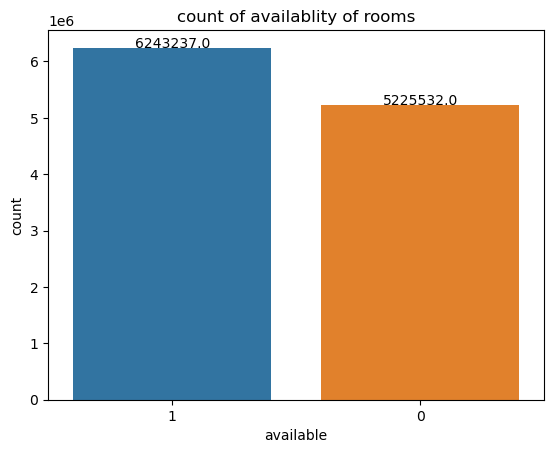

In [71]:
ax2=sns.countplot(x='available',data=Final_merge,order=Final_merge['available'].value_counts().index)

abs_values = Final_merge['available'].value_counts().values
#ax2.bar_label(container=ax2.containers[0], labels=abs_values)
for p in ax2.patches:
    ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('count of availablity of rooms')
plt.show()

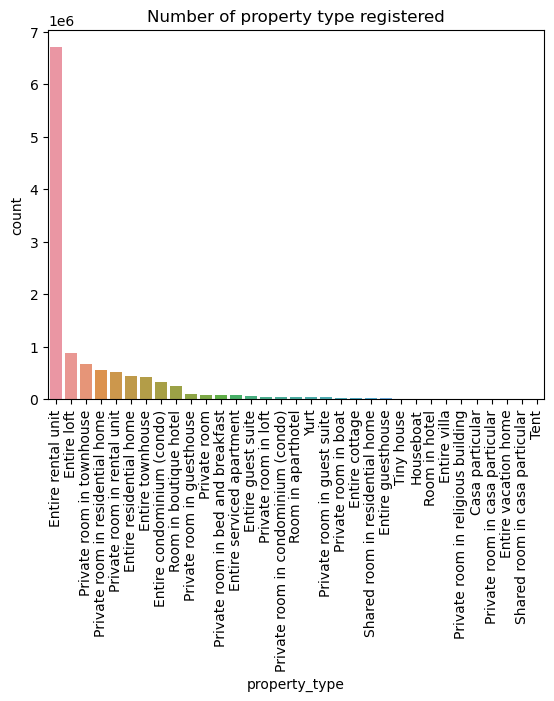

In [72]:
ax1=sns.countplot(x='property_type',data=Final_merge,order=Final_merge['property_type'].value_counts().index)

plt.xticks(rotation=90)
plt.title('Number of property type registered')
plt.show()

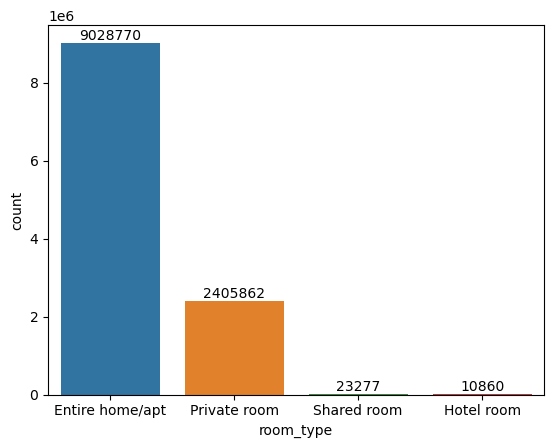

In [73]:
ax=sns.countplot(x='room_type',data=Final_merge,order=Final_merge['room_type'].value_counts(ascending=False).index)

abs_values = Final_merge['room_type'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()


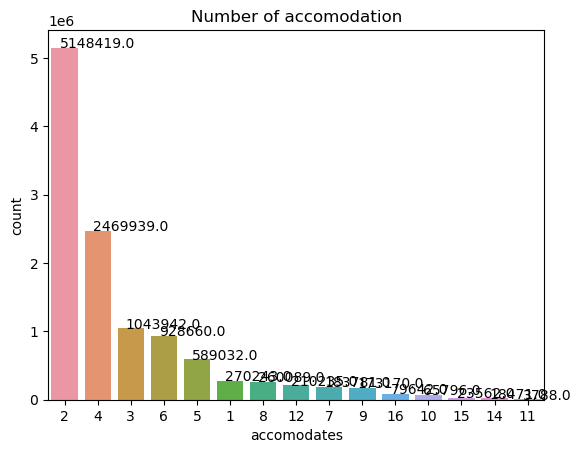

In [74]:
ax3=sns.countplot(x='accomodates',data=Final_merge,order=Final_merge['accomodates'].value_counts().index)
for p in ax3.patches:
    ax3.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Number of accomodation')
plt.show()

<Axes: xlabel='adjusted_price', ylabel='Count'>

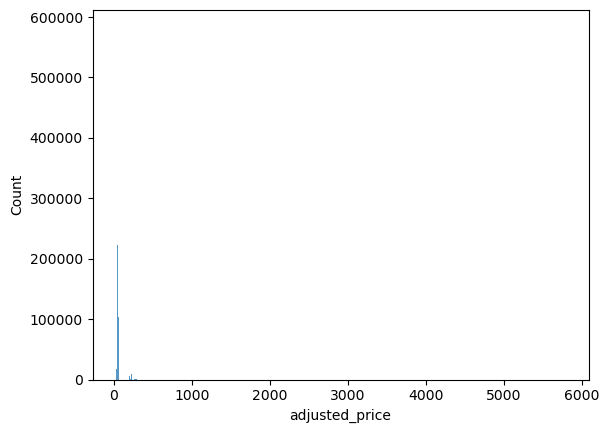

In [77]:
sns.histplot(data=Final_merge['adjusted_price'])

In [ ]:
Final_merge['amenities']

In [ ]:
sns.boxplot(data=Final_merge[['price','adjusted_price']])

In [ ]:
Q1 = Final_merge['price'].quantile(0.25)
Q3 = Final_merge['price'].quantile(0.75)
IQR = Q3 - Q1
IQR


In [ ]:
threshold = 1.5
outliers = Final_merge[(Final_merge['price'] < Q1 - threshold * IQR) | (Final_merge['price'] > Q3 + threshold * IQR)]
outliers

In [ ]:
df = Final_merge.drop(outliers.index)
df

Experimental_Data_Anaysis

In [ ]:
sns.histplot(data=Final_merge['price'])

In [ ]:
sns.histplot(data=df['price'])

In [ ]:
Final_merge['price'].unique()